In [35]:
#  Neil Normando
# The original author of this program is josephlee94

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("C:\\Users\\neiln\\Downloads\\housepricedata.csv")

In [6]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [7]:
dataset = df.values

In [8]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [9]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [15]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [17]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [18]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.6949 - accuracy: 0.4843 - val_loss: 0.6879 - val_accuracy: 0.4977
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5088 - val_loss: 0.6805 - val_accuracy: 0.5023
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5284 - val_loss: 0.6739 - val_accuracy: 0.5251
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5499 - val_loss: 0.6674 - val_accuracy: 0.5753
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.5978 - val_loss: 0.6613 - val_accuracy: 0.5982
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.5959 - val_loss: 0.6552 - val_accuracy: 0.6347
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6429 - val_loss: 0.6495 - val_accuracy: 0.6530
Epoch 8/100


In [23]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8630


0.8630136847496033

In [24]:
import matplotlib.pyplot as plt

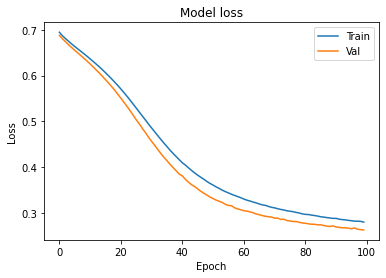

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [26]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

In [27]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 35ms/step - loss: 0.4917 - accuracy: 0.7671 - val_loss: 0.4498 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 0.3593 - accuracy: 0.8493 - val_loss: 0.3406 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.3243 - accuracy: 0.8630 - val_loss: 0.2875 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2865 - accuracy: 0.8787 - val_loss: 0.3037 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 28ms/step - loss: 0.3328 - accuracy: 0.8718 - val_loss: 0.2912 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2978 - accuracy: 0.8796 - val_loss: 0.3139 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2590 - accuracy: 0.9002 - val_loss: 0.2450 - val_accuracy: 0.9087
Epoch 

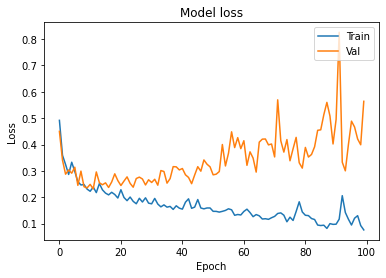

In [28]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [29]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [31]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 47ms/step - loss: 14.2478 - accuracy: 0.5871 - val_loss: 3.8957 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 1.6963 - accuracy: 0.8180 - val_loss: 0.6511 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5558 - accuracy: 0.8679 - val_loss: 0.4755 - val_accuracy: 0.8995
Epoch 4/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4973 - accuracy: 0.8699 - val_loss: 0.4554 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4800 - accuracy: 0.8757 - val_loss: 0.4953 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4883 - accuracy: 0.8718 - val_loss: 0.4366 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4673 - accuracy: 0.8767 - val_loss: 0.4295 - val_accuracy: 0.8995
Epoch

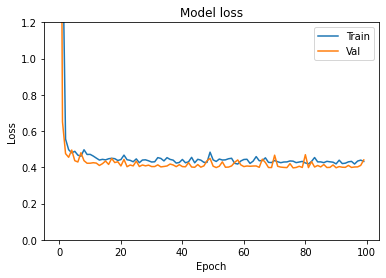

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()